In [2]:
import geopandas as gpd
from skimage.morphology import medial_axis, skeletonize
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiLineString, Point
from shapely.ops import polygonize
import numpy as np
import os
import geopandas as gp

In [3]:
#import data
#Import data
cd = os.getcwd()
inp = cd + "/data/"

#Files
# boyce_clark = "boyce_clark_figs.shp"
# griffin = "griffith_etal1986.shp"
# su = "su_etal2021.shp"
# cd_f = "CD_Final 2021-12-20.shp"

boyce_clark = "BC.shp"
griffin = "GFF.shp"
su = "SU.shp"
cd_f = "CD.shp"

In [4]:
gdf_boyce_clark = gp.read_file(inp + boyce_clark)
gdf_griffin = gp.read_file(inp + griffin)
gdf_su = gp.read_file(inp + su)
gdf_cdf = gp.read_file(inp + cd_f)

<Axes: >

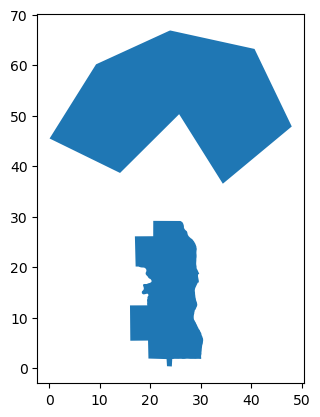

In [5]:
gdf_boyce_clark.plot()

In [6]:


# Function to convert a polygon to its skeleton
def polygon_to_skeleton(polygon, resolution=1000):
    """
    Converts a polygon to its skeleton.
    
    Parameters:
    polygon (Polygon): The polygon to skeletonize.
    resolution (int): The resolution of the grid for rasterization.
    
    Returns:
    MultiLineString: The skeleton of the polygon as a set of lines.
    """
    # Rasterize the polygon
    minx, miny, maxx, maxy = polygon.bounds
    x, y = np.meshgrid(np.linspace(minx, maxx, resolution), np.linspace(miny, maxy, resolution))
    points = np.c_[x.ravel(), y.ravel()]
    grid = np.array([polygon.contains(Point(p)) for p in points]).reshape(resolution, resolution)
    
    # Extract the skeleton
    skeleton = medial_axis(grid)
    print(skeleton)
    return grid, skeleton

In [31]:

# Assuming the first polygon in the file is the one we're interested in
polygon = gdf_boyce_clark.geometry[0]



# Convert the polygon to its skeleton
grid, skeleton = polygon_to_skeleton(polygon)

# # Convert skeleton back to line format (optional, could also return as-is)
# lines = polygonize(skeleton.astype(np.uint8))

# # Visualize the skeleton
# fig, ax = plt.subplots()
# gdf_boyce_clark.plot(ax=ax, facecolor='lightgrey')
# gpd.GeoSeries([skeleton]).plot(ax=ax, color='red')
# plt.show()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


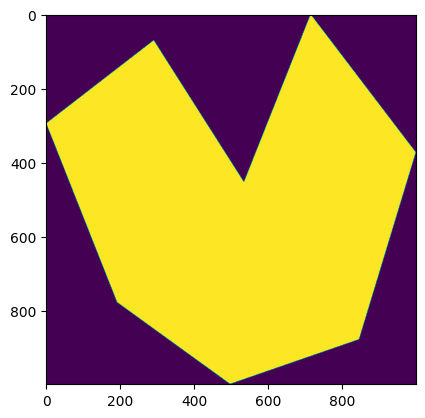

In [34]:
plt.imshow(grid)

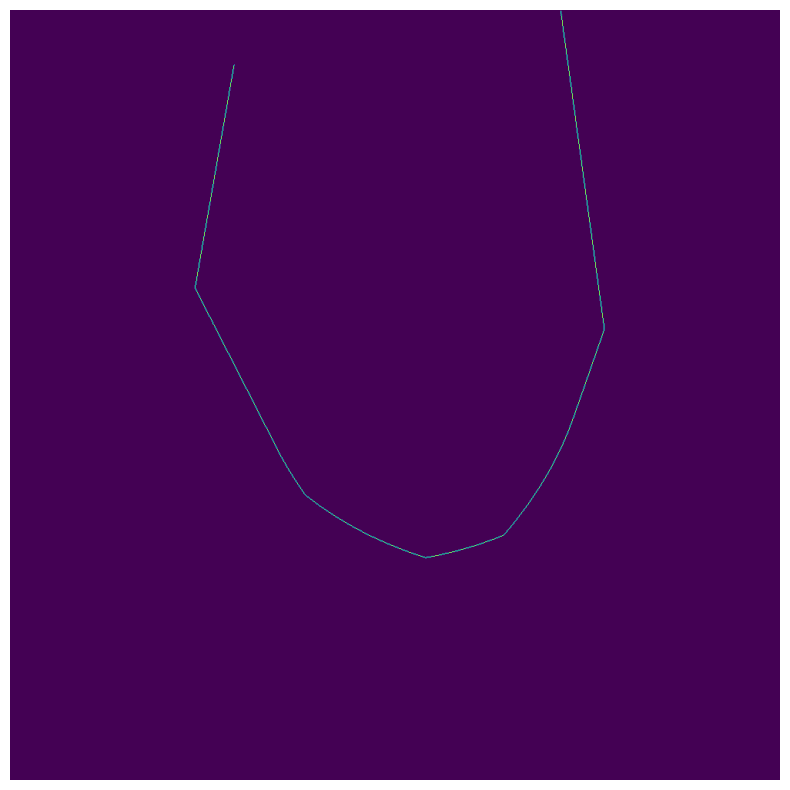

In [27]:
plt.figure(figsize=(10, 10))
plt.imshow(skeleton)
plt.axis('off')
plt.show()

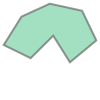

In [28]:
polygon

In [7]:
#Let's try a fucntion that preserves the coordinate system

import numpy as np
from shapely.geometry import Point, LineString, MultiLineString
from skimage.morphology import medial_axis

def polygon_to_skeleton_vector(polygon, resolution=1000):
    """
    Converts a polygon to its skeleton and returns both the rasterized skeleton
    and the skeleton as vector data.
    
    Parameters:
    polygon (Polygon): The polygon to skeletonize.
    resolution (int): The resolution of the grid for rasterization.
    
    Returns:
    numpy.ndarray: Rasterized skeleton as a grid.
    MultiLineString: The skeleton of the polygon as a set of lines in vector form.
    """
    # Rasterize the polygon
    minx, miny, maxx, maxy = polygon.bounds
    x, y = np.meshgrid(np.linspace(minx, maxx, resolution), np.linspace(miny, maxy, resolution))
    points = np.c_[x.ravel(), y.ravel()]
    grid = np.array([polygon.contains(Point(p)) for p in points]).reshape(resolution, resolution)
    
    # Extract the skeleton
    skeleton_grid = medial_axis(grid)

    # Convert skeleton grid back to vector coordinates
    y_idxs, x_idxs = np.where(skeleton_grid)
    # Convert grid indices back to coordinates
    xs = np.linspace(minx, maxx, resolution)
    ys = np.linspace(miny, maxy, resolution)
    skeleton_coords = list(zip(xs[x_idxs], ys[y_idxs]))

    # Convert coordinates to LineStrings (naive way, better to trace paths)
    lines = [LineString([skeleton_coords[i], skeleton_coords[i + 1]]) for i in range(len(skeleton_coords) - 1)]
    skeleton_vector = MultiLineString(lines)

    return grid, skeleton_coords, skeleton_grid, skeleton_vector


In [8]:
grid, coords, skeleton_grid, vector = polygon_to_skeleton_vector(polygon = gdf_boyce_clark.geometry[0], resolution=1000)

In [45]:
coords[0]

(34.432351735108014, 36.52749944392278)

In [46]:
coords[-1]

(26.029805855870293, 58.099271271312546)

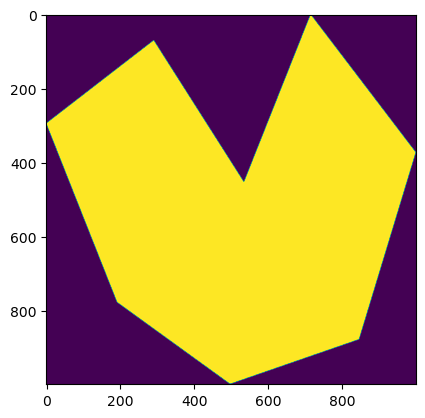

In [9]:
plt.imshow(grid)

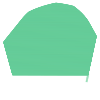

In [10]:
vector

In [50]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, MultiLineString

def plot_polygon_and_skeleton(polygon, skeleton_vector):
    """
    Plot the original polygon and its skeleton.
    
    Parameters:
    polygon (Polygon): The original polygon.
    skeleton_vector (MultiLineString): The vectorized skeleton of the polygon.
    """
    # Create GeoDataFrames for easy plotting
    gdf_polygon = gpd.GeoDataFrame({'geometry': [polygon]}, index=['polygon'])
    gdf_skeleton = gpd.GeoDataFrame({'geometry': [skeleton_vector]}, index=['skeleton'])

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 8))
    gdf_polygon.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Polygon')
    gdf_skeleton.plot(ax=ax, color='red', label='Skeleton', linewidth=1.5)

    plt.legend()
    plt.title("Polygon and Its Skeleton")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.axis('equal')  # Set equal scaling by changing axis limits
    plt.show()


/var/folders/fv/jg2h591964n6jt_g1g7zytz40000gn/T/ipykernel_16395/547226105.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


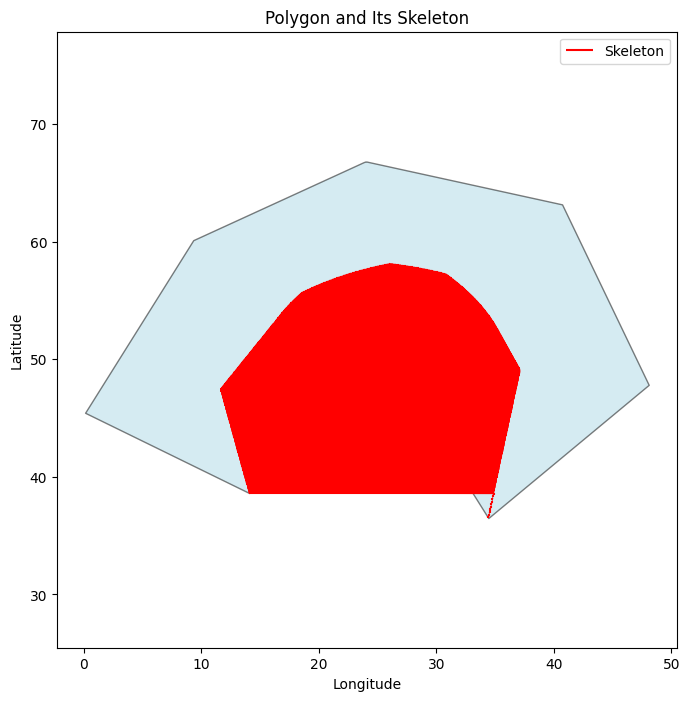

In [51]:
plot_polygon_and_skeleton(polygon, vector)

In [52]:
grid

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [53]:
skeleton_grid = medial_axis(grid)

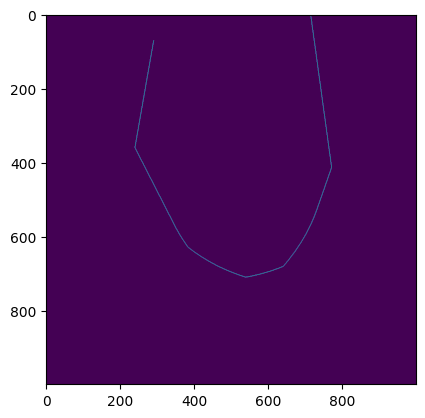

In [55]:
plt.imshow(skeleton_grid)


In [56]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid_with_skeleton_overlay(grid, skeleton_grid):
    """
    Plot the rasterized polygon (grid) with the skeleton obtained from the medial axis overlaid.
    
    Parameters:
    grid (numpy.ndarray): The rasterized polygon grid.
    skeleton_grid (numpy.ndarray): The grid of the skeleton.
    """
    # Create an RGB image where the grid is shown in one color and the skeleton in another
    # Initialize an empty RGB image
    rgb_image = np.zeros(grid.shape + (3,), dtype=np.uint8)

    # Set the grid area to blue
    rgb_image[grid, 0] = 0   # Red channel
    rgb_image[grid, 1] = 0   # Green channel
    rgb_image[grid, 2] = 255 # Blue channel
    
    # Overlay the skeleton in red
    rgb_image[skeleton_grid, 0] = 255 # Red channel
    rgb_image[skeleton_grid, 1] = 0   # Green channel
    rgb_image[skeleton_grid, 2] = 0   # Blue channel

    # Plot the combined image
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_image, origin='lower')  # Ensure correct orientation
    plt.title('Rasterized Polygon with Skeleton Overlay')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()


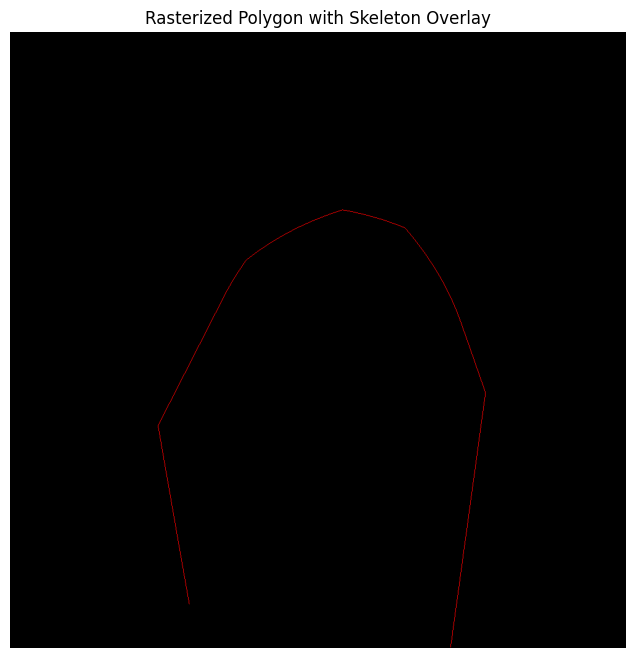

In [57]:
plot_grid_with_skeleton_overlay(grid, skeleton_grid)

In [74]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid_with_skeleton_points(grid, skeleton_grid):
    """
    Plot the rasterized polygon (grid) with the skeleton points overlaid.
    
    Parameters:
    grid (numpy.ndarray): The rasterized polygon grid, binary array.
    skeleton_grid (numpy.ndarray): The grid of the skeleton, binary array.
    """
    plt.figure(figsize=(8, 8))
    
    # Plot the grid as the background
    plt.imshow(grid, cmap='Greys', origin='lower', alpha=0.5)  # Light background
    
    # Find coordinates of skeleton points
    y, x = np.where(skeleton_grid)
    
    # Overlay the skeleton points
    plt.scatter(x, y, color='red', s=1)  # Small red points for the skeleton

    plt.title('Rasterized Polygon with Skeleton Overlay')
    plt.axis('off')  # Hide axes for a cleaner look
    plt.show()


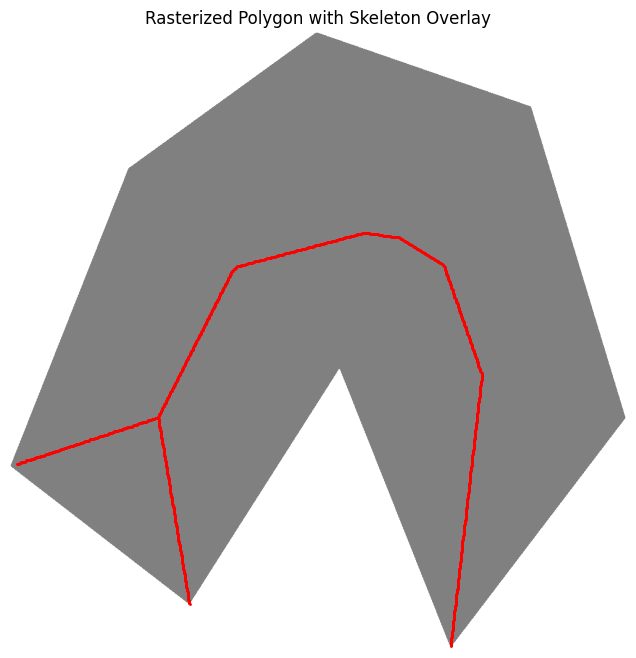

In [79]:
plot_grid_with_skeleton_points(grid, othertry)


In [77]:
othertry = skeletonize(grid)

In [12]:
#Let's try using scipy
import matplotlib.pyplot as plt
#from scipy.misc import imresize
import matplotlib.image as mpimg
import math
import numpy as np
import scipy.ndimage.morphology as morphOps

In [26]:
number_of_samples = 60
epsilon = 1 
flux_threshold = 10

In [15]:
distImage,IDX = morphOps.distance_transform_edt(grid,return_indices=True)

C:\Users\vanessa610\AppData\Local\Temp\ipykernel_38168\3623802532.py:1: DeprecationWarning: Please import `distance_transform_edt` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  distImage,IDX = morphOps.distance_transform_edt(grid,return_indices=True)


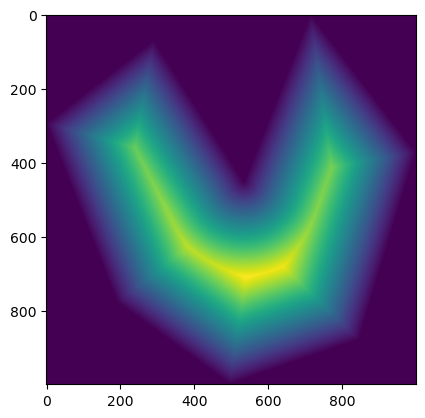

In [16]:
plt.imshow(distImage)

In [17]:
def sample_sphere_2D(number_of_samples):
    sphere_points = np.zeros((number_of_samples,2))
    alpha = (2*math.pi)/(number_of_samples)
    for i in range(number_of_samples):
        sphere_points[i][0] = math.cos(alpha*(i-1))
        sphere_points[i][1] = math.sin(alpha*(i-1))
    return sphere_points

In [18]:
sphere_points = sample_sphere_2D(number_of_samples)

In [19]:
def sub2ind(array_shape, rows, cols):
    ind = rows*array_shape[1] + cols
    ind[ind < 0] = -1
    ind[ind >= array_shape[0]*array_shape[1]] = -1
    return ind

def ind2sub(array_shape, ind):
    ind[ind < 0] = -1
    ind[ind >= array_shape[0]*array_shape[1]] = -1
    rows = (ind.astype('int') / array_shape[1])
    cols = ind % array_shape[1]
    return (rows, cols)

In [20]:
def compute_aof(distImage ,IDX,sphere_points,epsilon):

    m = distImage.shape[0]
    n = distImage.shape[1]
    normals = np.zeros(sphere_points.shape)
    fluxImage = np.zeros((m,n))
    for t in range(0,number_of_samples):
        normals[t] = sphere_points[t]
    sphere_points = sphere_points * epsilon
    
    XInds = IDX[0]
    YInds = IDX[1]
    
    for i in range(0,m):
        for j in range(0,n):       
            flux_value = 0
            if (distImage[i][j] > -1.5):
                if( i > epsilon and j > epsilon and i < m - epsilon and j < n - epsilon ):
#                   sum over dot product of normal and the gradient vector field (q-dot)
                    for ind in range (0,number_of_samples):
                                                
#                       a point on the sphere
                        px = i+sphere_points[ind][0]+0.5;
                        py = j+sphere_points[ind][1]+0.5;
                        
                        
                        
                        
#                       the indices of the grid cell that sphere points fall into 
                        cI = math.floor(i+sphere_points[ind][0]+0.5)
                        cJ = math.floor(j+sphere_points[ind][1]+0.5)
                                               

#                       closest point on the boundary to that sphere point

                        bx = XInds[cI][cJ]
                        by = YInds[cI][cJ]
#                       the vector connect them
                        qq = [bx-px,by-py]
                    
                        d = np.linalg.norm(qq)
                        if(d!=0):
                            qq = qq / d
                        else:
                            qq = [0,0]                        
                        flux_value = flux_value + np.dot(qq,normals[ind])
            fluxImage[i][j] = flux_value  
    return fluxImage

In [35]:
fluxImage = compute_aof(distImage,IDX,sphere_points,epsilon)

In [36]:
print(fluxImage.shape)

(1000, 1000)


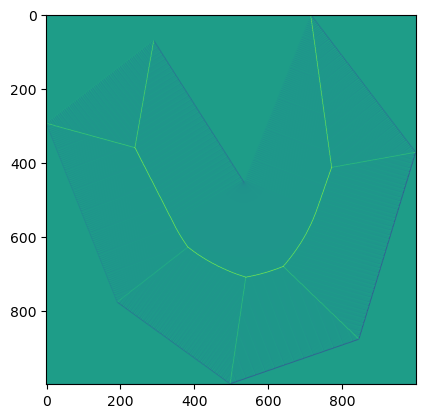

In [37]:
plt.imshow(fluxImage)

In [42]:
import copy

In [56]:
skeletonImage = copy.deepcopy(fluxImage)
skeletonImage[fluxImage < 9] = 0
skeletonImage[fluxImage > 9] = 1

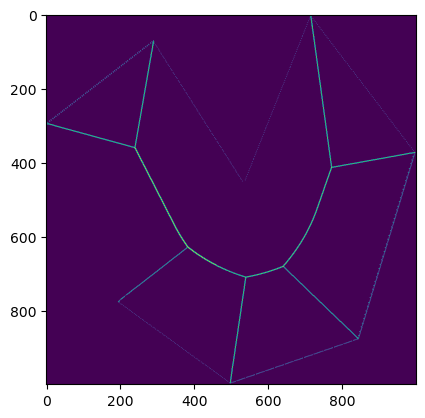

In [57]:
plt.imshow(skeletonImage)

In [157]:
gdf_su.total_bounds

array([ 2.33456863,  2.46502308, 99.16616923, 75.35720769])

In [159]:
np.array(gdf_su.iloc[0].geometry.bounds)

array([48.60184615, 37.74610769, 74.85290769, 48.62737692])

In [168]:
list(gdf_su.iloc[0].geometry.boundary.coords)

[(48.60184615391951, 48.6273769231943),
 (74.85290769229715, 48.6273769231943),
 (74.85290769229715, 37.746107692328785),
 (48.60184615391951, 37.746107692328785),
 (48.60184615391951, 48.6273769231943)]

In [175]:
width

262

In [179]:
#try same thing but with rasterio

import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_origin

#Define the resolution 
resolution = 0.1  #grid size nxn

#Create bounds for the raster
bounds = np.array(gdf_su.iloc[0].geometry.bounds)
e = 10
width = int(((bounds[2] - bounds[0])+e) / resolution)
height = int(((bounds[3] - bounds[1])+e) / resolution)

#Create a transform for the raster (upper-left corner, width and height of pixels)
transform = from_origin(west=bounds[0], north=bounds[3], xsize=resolution, ysize=resolution)

#Rasterize the GeoDataFrame #Array representing data
raster = rasterize(
    [(geom, 1) for geom in gdf_su.geometry],  # Burn a value of 1 for all geometries
    out_shape=(height, width),
    fill=0,  # Assumes 0 as the fill value for non-data areas
    transform=transform,
    dtype=rasterio.int32
)


#Define metadata
out_meta = {
    'driver': 'GTiff',
    'height': height,
    'width': width,
    'count': 1,
    'dtype': rasterio.int32,
    'crs': gdf_su.crs,
    'transform': transform,
    'nodata': 0
}

#Rasterize the GeoDataFrame
with rasterio.open('output_raster_su_0_5m.tif', 'w', **out_meta) as out_raster:
    out_raster.write(
        rasterize(
            #shapes=((geometry, value) for geometry, value in zip(gdf_su.geometry, gdf_su['ID'])),
            shapes=[(gdf_su.geometry.iloc[0], 1)],
            out_shape=(height, width),
            transform=transform,
            fill=0,
            all_touched=True,
            dtype=rasterio.int32
        ),
        1  #writing to the first band
    )


In [192]:
import rasterio
from rasterio.features import rasterize
from rasterio.transform import from_origin
import numpy as np


def geom_to_raster(geom, output_file, crs):
    # Example GeoDataFrame 'gdf_su' with a 'geometry' column
    # gdf_su = your_geo_dataframe

    # Desired raster dimensions and margin
    raster_width, raster_height = 1000, 1000
    margin = 10  # Desired margin in units of the CRS

    # Calculate bounds with margin
    bounds = np.array(geom.bounds)
    expanded_bounds = [
        bounds[0] - margin,
        bounds[1] - margin,
        bounds[2] + margin,
        bounds[3] + margin
    ]

    # Calculate resolution based on expanded bounds and desired raster size
    width_in_units = expanded_bounds[2] - expanded_bounds[0]
    height_in_units = expanded_bounds[3] - expanded_bounds[1]
    resolution_x = width_in_units / raster_width
    resolution_y = height_in_units / raster_height

    # Create a transform for the raster
    transform = from_origin(
        west=expanded_bounds[0],
        north=expanded_bounds[3],
        xsize=resolution_x,
        ysize=resolution_y  
    )

    # Rasterize the geometry
    raster = rasterize(
        [(geom, 1)],
        out_shape=(raster_height, raster_width),
        transform=transform,
        fill=0,
        all_touched=True,
        dtype=rasterio.int32
    )

    # Define metadata for the output raster
    out_meta = {
        'driver': 'GTiff',
        'height': raster_height,
        'width': raster_width,
        'count': 1,
        'dtype': rasterio.uint8,
        'crs': crs,
        'transform': transform,
        'nodata': 0
    }

    # Write the rasterized geometry to a new raster file
    with rasterio.open(output_file, 'w', **out_meta) as out_raster:
        out_raster.write(raster, 1)


In [193]:
geom_to_raster(gdf_su.iloc[0].geometry, "output_raster_su_0_5m.tif", gdf_su.crs)

In [325]:
geom_to_raster(gdf_boyce_clark.iloc[1].geometry, "bc_raster_2.tif", gdf_boyce_clark.crs)

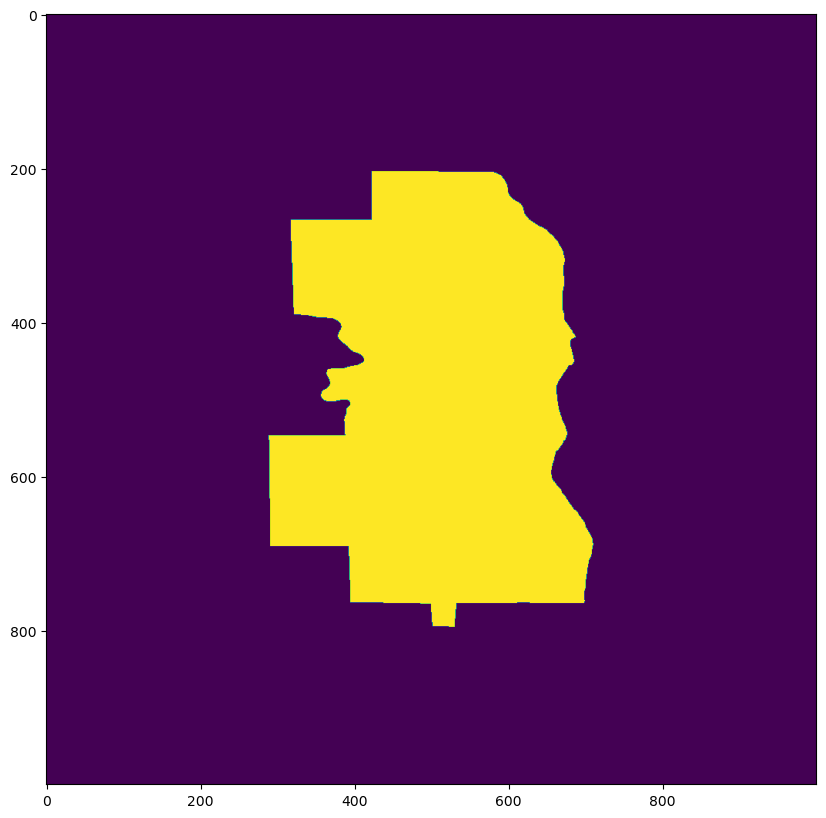

In [326]:
def plot_raster_alternative(path):
    with rasterio.open(path) as src:
        # Read the raster data
        data = src.read(1)  # Read the first band; adjust if necessary for multi-band rasters

        # Plot using matplotlib
        fig, ax = plt.subplots(figsize=(10, 10))
        # Display the data
        cmap = plt.cm.viridis  # Choose a colormap, 'viridis' is just one option
        ax.imshow(data)
        plt.show()

plot_raster_alternative("bc_raster_2.tif")

In [203]:
#Calculate skeleton
su0 = rasterio.open("output_raster_su_0_5m.tif")
su1 = su0.read(1)

In [387]:
#bC
bc0 = rasterio.open("bc_raster_1.tif")
bc1 = bc0.read(1)

bc_1 = rasterio.open("bc_raster_2.tif")
bc2 = bc_1.read(1)

In [275]:
#calculate skeleton for this one

def get_flux(img, number_of_samples,epsilon):
    distImage,IDX = morphOps.distance_transform_edt(img,return_indices=True)
    sphere_points = sample_sphere_2D(number_of_samples)
    fluxImage_su = compute_aof(distImage,IDX,sphere_points,epsilon)
    return fluxImage_su

In [403]:
fluxImageBC = get_flux(bc2, number_of_samples, epsilon)

C:\Users\vanessa610\AppData\Local\Temp\ipykernel_38168\3532594240.py:4: DeprecationWarning: Please import `distance_transform_edt` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  distImage,IDX = morphOps.distance_transform_edt(img,return_indices=True)


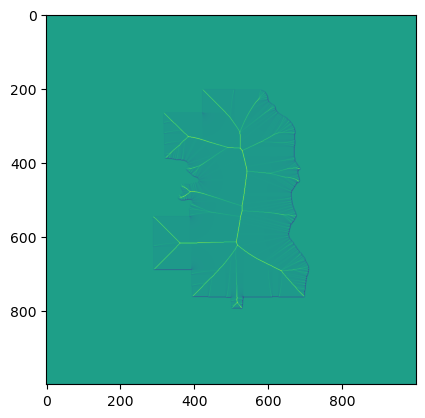

In [430]:
plt.imshow(fluxImageBC)

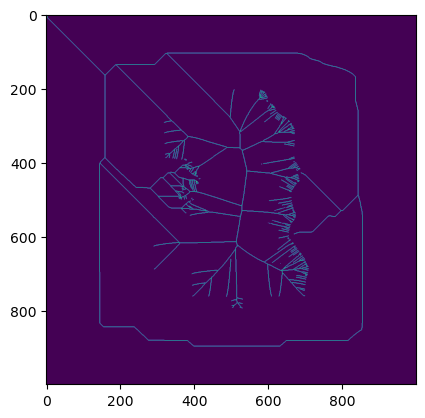

In [431]:
skeletonImageBC = np.where(fluxImageBC<=2, False, True)
Thined_imageBC = skeletonize(skeletonImageBC)
plt.imshow(Thined_imageBC)

In [246]:
def save_np_as_raster(image, crs, transform, output_file_name):
    # If image has shape (1, height, width), reshape it to (height, width) for rasterio
    if image.ndim == 3 and image.shape[0] == 1:
        image = image.reshape(image.shape[1], image.shape[2])
    
    # Determine appropriate dtype based on numpy dtype
    if image.dtype == np.bool_ or image.dtype == np.uint8:
        dtype = rasterio.uint8
    elif image.dtype == np.int32:
        dtype = rasterio.int32
    else:
        # Add handling for other data types as necessary
        raise ValueError("Unsupported image dtype for raster export.")

    # Create the dataset
    with rasterio.open(
        output_file_name,
        'w',
        driver='GTiff',
        height=image.shape[0],  # image now has shape (height, width)
        width=image.shape[1],  # image now has shape (height, width)
        count=1,  # single band
        dtype=dtype,
        crs=crs,
        transform=transform
    ) as dst:
        dst.write(image, 1)  # Write the image data to the first band



In [247]:
save_np_as_raster(skeletonImage_su, su0.crs,  su0.transform, cd + "\skeleton_raster_su1.tif")

In [415]:
save_np_as_raster(Thined_imageBC, bc_1.crs,  bc_1.transform, cd + "\skeleton_raster_bc2.tif")

In [248]:
su_skeleton = rasterio.open("skeleton_raster_su1.tif")

In [152]:
#raster to polygon
from whitebox_tools import WhiteboxTools

In [261]:
wbt = WhiteboxTools()
wbt.exe_path = r"C:\Users\vanessa610\Documents\Winter 2024\GEOG 275\Final Project\.conda\Library\bin"
wbt.set_working_dir(cd)

In [262]:
wbt.raster_to_vector_lines(cd+"\skeleton_raster_su1.tif", cd +'\skeleton_su1.shp')

.\whitebox_tools.exe --run="RasterToVectorLines" --wd="c:\Users\vanessa610\Documents\Winter 2024\GEOG 275\Final Project" --input='c:\Users\vanessa610\Documents\Winter 2024\GEOG 275\Final Project\skeleton_raster_su1.tif' --output='c:\Users\vanessa610\Documents\Winter 2024\GEOG 275\Final Project\skeleton_su1.shp' -v --compress_rasters=False

**********************************
* Welcome to RasterToVectorLines *
* Powered by WhiteboxTools       *
* www.whiteboxgeo.com            *
**********************************
Reading data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
P

0

In [416]:
wbt.raster_to_vector_lines(cd+"\skeleton_raster_bc2.tif", cd +'\skeleton_bc2.shp')

.\whitebox_tools.exe --run="RasterToVectorLines" --wd="c:\Users\vanessa610\Documents\Winter 2024\GEOG 275\Final Project" --input='c:\Users\vanessa610\Documents\Winter 2024\GEOG 275\Final Project\skeleton_raster_bc2.tif' --output='c:\Users\vanessa610\Documents\Winter 2024\GEOG 275\Final Project\skeleton_bc2.shp' -v --compress_rasters=False

**********************************
* Welcome to RasterToVectorLines *
* Powered by WhiteboxTools       *
* www.whiteboxgeo.com            *
**********************************


Reading data...
Progress: 0%
Progress: 1%
Progress: 2%
Progress: 3%
Progress: 4%
Progress: 5%
Progress: 6%
Progress: 7%
Progress: 8%
Progress: 9%
Progress: 10%
Progress: 11%
Progress: 12%
Progress: 13%
Progress: 14%
Progress: 15%
Progress: 16%
Progress: 17%
Progress: 18%
Progress: 19%
Progress: 20%
Progress: 21%
Progress: 22%
Progress: 23%
Progress: 24%
Progress: 25%
Progress: 26%
Progress: 27%
Progress: 28%
Progress: 29%
Progress: 30%
Progress: 31%
Progress: 32%
Progress: 33%
Progress: 34%
Progress: 35%
Progress: 36%
Progress: 37%
Progress: 38%
Progress: 39%
Progress: 40%
Progress: 41%
Progress: 42%
Progress: 43%
Progress: 44%
Progress: 45%
Progress: 46%
Progress: 47%
Progress: 48%
Progress: 49%
Progress: 50%
Progress: 51%
Progress: 52%
Progress: 53%
Progress: 54%
Progress: 55%
Progress: 56%
Progress: 57%
Progress: 58%
Progress: 59%
Progress: 60%
Progress: 61%
Progress: 62%
Progress: 63%
Progress: 64%
Progress: 65%
Progress: 66%
Progress: 67%
Progress: 68%
Progress: 69%
Progress: 70%


0

In [266]:
skelsu1 = gp.read_file(cd+"\skeleton_su1.shp")

<Axes: >

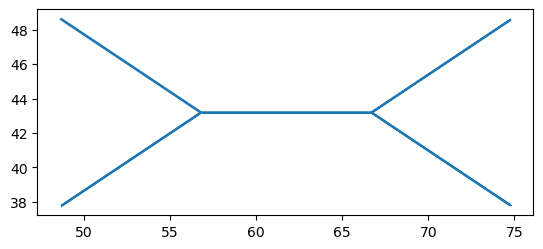

In [269]:
skelsu1.plot()

In [281]:
skelbc = gp.read_file(cd + "\skeleton_bc1.shp")

<Axes: >

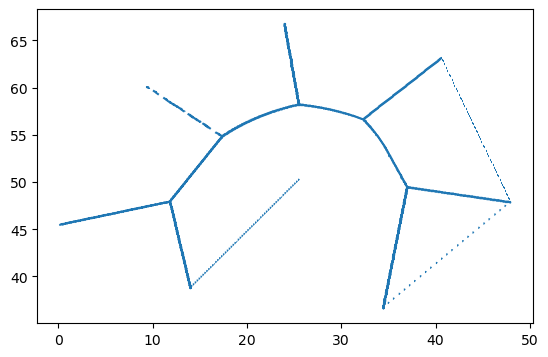

In [284]:
skelbc.plot()

In [305]:
skelbc['length'] = skelbc.length

In [417]:
skelbc2 = gp.read_file(cd + "\skeleton_bc2.shp")

In [418]:
skelbc2['length'] = skelbc2.length

In [419]:
skelbc2['length'].describe()

count    213.000000
mean       1.426006
std        3.801691
min        0.034491
25%        0.163262
50%        0.522003
75%        1.257867
max       48.545938
Name: length, dtype: float64

<Axes: >

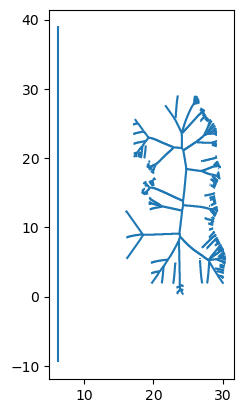

In [420]:
skelbc2.plot()

In [421]:
skelbc2 = skelbc2[skelbc2['length']<30]
skelbc = skelbc[skelbc.length>0.6]

In [422]:
skelbc2['polID'] = 2
skelbc['polID'] = 1

c:\Users\vanessa610\Documents\Winter 2024\GEOG 275\Final Project\.conda\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [423]:
import pandas as pd

bc = pd.concat([skelbc,skelbc2])

<Axes: >

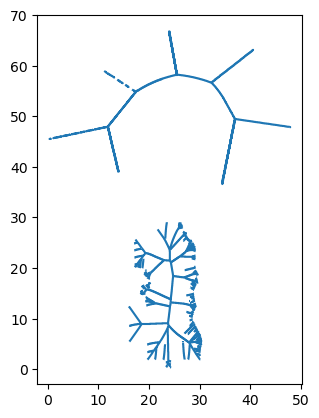

In [424]:
bc.plot()

In [425]:
#plot skeleton with polygon 

def plot_skel(gdf_polygon, gdf_skeleton):
    _, ax = plt.subplots(figsize=(10, 10))  # Create a figure and a set of subplots

    # Plot the original polygons
    gdf_polygon.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Polygon')

    # Plot the skeleton on top
    gdf_skeleton.plot(ax=ax, color='red', linewidth=1, label='Skeleton')

    # Optional: Customize further
    ax.set_title('Polygon with Vector Skeleton')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.legend()  # Show legend

    plt.show()

C:\Users\vanessa610\AppData\Local\Temp\ipykernel_38168\513050033.py:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()  # Show legend


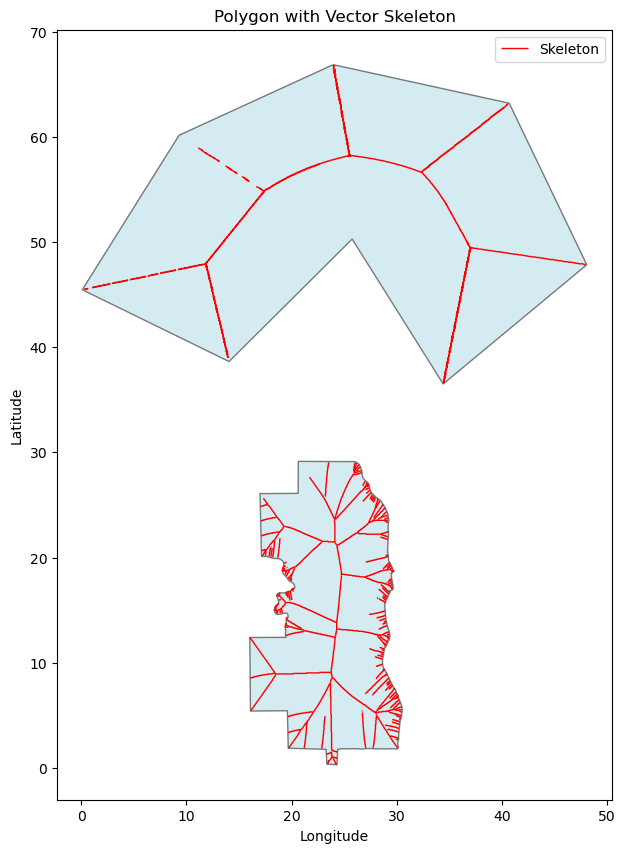

In [426]:
plot_skel(gdf_boyce_clark, bc)

In [428]:
#create a measure of compactness

